In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import re
from sklearn import metrics 
from sklearn.metrics import accuracy_score

Giving names to the rows

In [2]:
df_col = ['id','Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','1.3','Bland_Chromatin','Normal_Nucleoli','Mitoses','Cancer_Type']

Importing data

In [3]:
df = pd.read_csv(r'C:\Users\Sumanth\OneDrive\UAB\Fall 2022\Machine Learning\Newton Raphson\breast_cancer_wisconsin.data',encoding='latin-1',names=df_col)
df.head(3)

,id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,1.3,Bland_Chromatin,Normal_Nucleoli,Mitoses,Cancer_Type
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


2 for benign, 4 for malignant

In [4]:
df.shape

(699, 11)

In [5]:
df.corr()

,id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Cancer_Type
id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
Clump_Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Uniformity_of_Cell_Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Uniformity_of_Cell_Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal_Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single_Epithelial_Cell_Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Bland_Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Normal_Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Cancer_Type,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


From the correlation we get to know that the row id has nothing to do with the end result and can be removed

In [6]:
df['1.3'].head(3)

0     1
1    10
2     2
Name: 1.3, dtype: object

Removing the columns with '?'

In [7]:
df1 = df.drop('id',axis = 1)
df2 = df1[df1['1.3'] == '?']
df3 = df1.drop([23,40,139,145,158,164,235,249,275,292,294,297,315,321,411,617])
df3['1.3'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [8]:
df3.dtypes

Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
1.3                            object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Cancer_Type                     int64
dtype: object

In [9]:
df2.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,1.3,Bland_Chromatin,Normal_Nucleoli,Mitoses,Cancer_Type
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2


In [10]:
df3['1.3'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

Converting the datatype from object to float

In [11]:
df5 = df3.replace('[^\d.]','',regex = True).astype(float)
df5.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,1.3,Bland_Chromatin,Normal_Nucleoli,Mitoses,Cancer_Type
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0


In [12]:
df5['Cancer_Type'] = df5['Cancer_Type'].replace(2,0)
df5['Cancer_Type'] = df5['Cancer_Type'].replace(4,1)

In [13]:
df5.dtypes

Clump_Thickness                float64
Uniformity_of_Cell_Size        float64
Uniformity_of_Cell_Shape       float64
Marginal_Adhesion              float64
Single_Epithelial_Cell_Size    float64
1.3                            float64
Bland_Chromatin                float64
Normal_Nucleoli                float64
Mitoses                        float64
Cancer_Type                    float64
dtype: object

In [14]:
df5.isnull().sum()

Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
1.3                            0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Cancer_Type                    0
dtype: int64

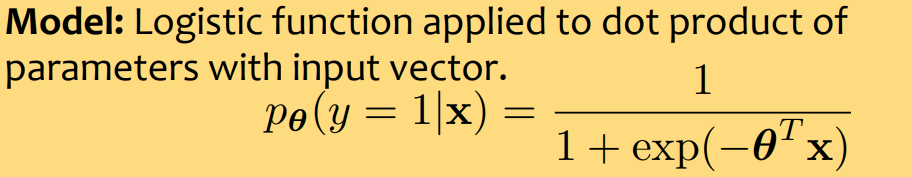

In [15]:
train_set = 0.8 
number_of_split=10
Lr_overall = 0 
Sk_overall = 0 
randomnumbers = np.random.rand(len(df5)) < train_set
train_df = df5[randomnumbers]
test_df = df5[~randomnumbers]
train_x = train_df.drop(["Cancer_Type"],axis=1)  
train_y = train_df["Cancer_Type"].values
test_x = test_df.drop(["Cancer_Type"],axis=1)
test_y = test_df["Cancer_Type"].values
ap = np.array(test_x).shape[0]
Intercept = np.ones((ap, 1))

In [16]:
def prediction (b, X):
        X = np.c_[X, Intercept]
        z = np.dot(b, X.transpose()) 
        probability = 1/(1 + np.exp(-z))
        predicted_result = [0 if i <0.5 else 1 for i in probability]
        
        return predicted_result

In [17]:
def logistic_regr(X,Y):
    Iteration_overall=150
    Iteration_count=0
    conver_tol=0.000000001
    final=np.zeros(X.shape[1]+1)
    final1=[]
    Intercept_X=np.ones((X.shape[0],1))
    X=np.c_[X, Intercept_X]
    while((Iteration_count<=Iteration_overall)):
        Iteration_count+=1
        final1=final
        z = np.dot(final, X.transpose()) 
        probability = 1/(1 + np.exp(-z))
        grad_descent = np.dot((Y - probability),X)
        we = probability*(1-probability)
        xP = np.array([i*j for (i,j) in zip(X,we)])
        hesian = -1*np.dot(xP.transpose(), X)
        final = final - (np.dot(np.linalg.inv(hesian),grad_descent))
        fin = np.linalg.norm(final-final1)
        if(fin<=conver_tol):
            break
    return final

In [18]:
for i in range(number_of_split):
    final=logistic_regr(np.array(train_x), train_y)
    predicted= prediction(final,np.array(test_x))
    test_Y = test_y
    accuracy  = metrics.accuracy_score(test_Y, predicted)
    Lr_overall += accuracy
    logistic_regg_avg=Lr_overall/number_of_split 
    print(round(accuracy,2))

0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96
0.96


In [19]:
X=df.drop(["Cancer_Type","1.3"],axis=1)
Y=df['Cancer_Type'].values
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.2)

In [20]:
for i in range(number_of_split):
    logregr= LogisticRegression(max_iter = 150)
    logregr.fit(train_x,train_y)
    Sk_overall += logregr.score(test_x,test_y)
    
logistic_Sk_avg=Sk_overall/number_of_split

Using a solver can increase the efficiency of Sk learn Logistic Regression

Accuracy of Newton method VS Sklearn method

In [21]:
print('Newton method :',logistic_regg_avg)
print('Sklearn Logistic regression:',logistic_Sk_avg)

Newton method : 0.9565217391304348
Sklearn Logistic regression: 0.642857142857143
